# Understanding neural networks

In this notebook we will give a brief introduction to understanding neural networks. Often, neural networks are considered "black boxes": Although we know how to train neural networks, we typically don't really know what they do and how they work after we have trained them. This is already the case for many relatively small neural networks and definitely the case for the huge deep neural networks used for instance as large language models. 

It may sound strange that we do not understand something that we programmed and trained ourselves. And in fact, neural networks are "white boxes" in the sense that we know exactly what is going on inside of them. The computer can only apply a neural network to digital data, since all operations are known and well defined in the code. So what is the source of the problem?

The problem lies in _complexity_: Although we understand the functioning of each neuron in the network, we typically do not understand how local neural activations influence each other and combine to generate a global behavior. In the case of a neural network we perfectly know how a neuron is adding together weighted inputs and passing the weighted sum through an activation function, but we typically do not know which role such an individual neuron plays in fulfilling the task of the neural network. 
  
Despite the obvious challenges, it is possible to analyze the functioning of neural networks. For one, artificial neural networks allow for tracking and influencing any individual neuron or synaptic weight - giving AI researchers an important edge over biologists studying animal brains. 

Before we go to an exercise in neural network analysis, there are still two main questions to address.

## 1. Why should we want to understand neural networks?

The first question that may pop up in your mind is: "Why should we want to understand neural networks?" 

1. Justifying outcomes: Neural networks are increasingly used in applications that impact people's lives. In this light, it is imperative that decisions or suggestions made by neural networks can be explained.

2. Predicting the network's outputs for unseen samples: Neural networks are trained on a training set, but eventually they are deployed in the real world, in which they will face data unseen during training. Understanding the neural network will allow predicting the generalization and limitations of the network. 

3. Improving the network (e.g., its training): Understanding the properties and limitations of the neural network may give insight into ways to improve the network's architecture or training, leading to better performance.

4. Learning from the network’s solution: Neural networks sometimes find novel solutions to problems not thought of before by humans. Understanding the network's solution may give novel insights into the problem at hand.

5. The inherent satisfaction of understanding. Does this need an explanation?

## 2. What does it mean to "understand"?

What it means to "understand" is a topic that is still under scientific debate. For the goal of this notebook, we will scope it down to  rather scientific viewpoint. In particular, "objective understanding" is tightly linked to the scientific process of forming models / hypotheses and testing them by means of verifying predictions. If one understands a neural network, it hence should become possible to do predictions on its performance on data on which it has not yet been tested. Typically, understanding contains an element of compression, e.g., from many data points to a simplified model consisting of a few rules. 

Finally, a neural network can be understood at different levels. On the one hand, one can influence its inputs and outputs, and study the neural network as a "black box", similarly as cognitive psychologists perform experiments with human subjects, influencing their senses and observing their behavior. This can give insights into the type of strategy that the neural network employs for solving the task. On the other hand, one can really try to understand the inner workings of the network, trying to elucidate the functional role of neural layers or individual neurons.


# Analysis of a simple regression multi-layer perceptron

In what follows, we will analyze how a multi-layer perceptron solves the regression of a quadratic function. The analysis will allow it to predict the behavior of the network beyond the initial training range. 

<span style="color:red">Exercise 1</span>

Ever since you made the exercises on regression with a multi-layer perceptron, you wondered how it succeeded in fitting the quadratic function.

In order to investigate this, you made the following code that does not only execute the network and returns the outputs, but also stores the activations of the hidden units (the weighted sum of inputs), and the outputs of the hidden units (after passing the weighted sum through the activation function).

1. First run the following cell to train the neural network. A performance $< 0.15$ is good enough.


Epoch [100/1000], Loss: 1.1934
Epoch [200/1000], Loss: 0.5360
Epoch [300/1000], Loss: 0.3759
Epoch [400/1000], Loss: 0.3185
Epoch [500/1000], Loss: 0.2790
Epoch [600/1000], Loss: 0.2450
Epoch [700/1000], Loss: 0.2155
Epoch [800/1000], Loss: 0.1898
Epoch [900/1000], Loss: 0.1671
Epoch [1000/1000], Loss: 0.1470


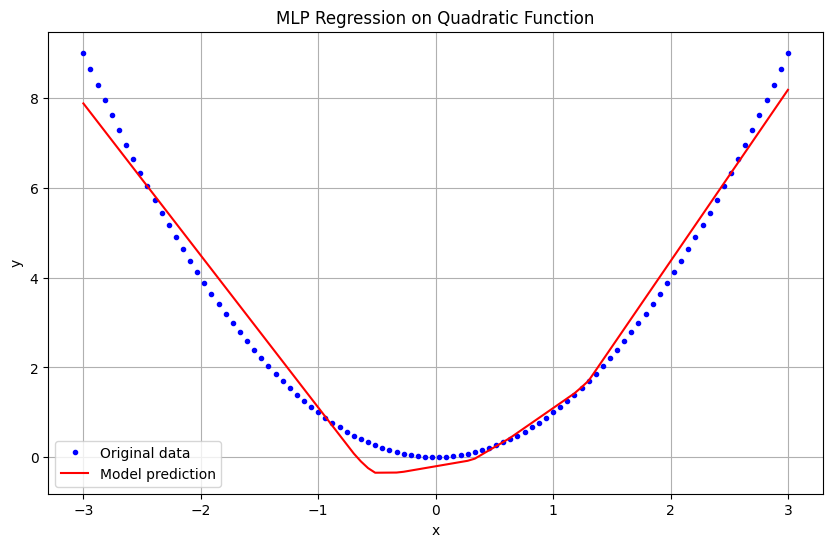

In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt

# create an MLP neural network class with one hidden layer
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden = torch.nn.Linear(input_size, hidden_size)
        self.output = torch.nn.Linear(hidden_size, output_size)
        self.activation = torch.nn.ReLU()
        # self.activation = torch.nn.Tanh()

    def forward(self, x):
        self.a = self.hidden(x)
        self.h = self.activation(self.a)
        x = self.output(self.h)
        return x
    
# create a dataset
def create_dataset(n_samples=100, range=3):
    x = np.linspace(-range, range, n_samples)
    y = x**2
    x = x.reshape(-1, 1).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return torch.from_numpy(x), torch.from_numpy(y)

# train the model
def train_model(model, x_train, y_train, n_epochs=1000, learning_rate=0.01):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    model.train()

    for epoch in range(n_epochs):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
    
    return model

# create the dataset and model, and train it:
x,y = create_dataset()
model = MLP(input_size=1, hidden_size=10, output_size=1)
model = train_model(model, x, y)

# show the performance on the training set:
model.eval()
# first run it on the training data set:
with torch.no_grad():
    y_train_pred = model(x).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), 'b.', label='Original data')
plt.plot(x.numpy(), y_train_pred, 'r-', label='Model prediction')
plt.title('MLP Regression on Quadratic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


2. How do you think the network will generalize to the region outside of $x \in [-3,3]$? Will the neural network prediction be lower or higher than the original data? Why do you think this? Answer these questions for yourself by reflecting on the neural network properties, before going to the next question.

3. You decide to investigate the role of each hidden neuron. In order to do this, you make a test set with a larger range, $x \in [-10, 10]$, with more samples. Change the following code to plot each individual neuron's contribution to the output. 

In [ ]:
xx, yy = create_dataset(n_samples=1000, range=10)

with torch.no_grad():
    y_pred = model(xx).numpy()
    
    # Your code to extract the right data
    
# plot the neural activations:
plt.figure(figsize=(12, 8))
# plot the original data and the model's predictions
plt.plot(x.numpy(), y.numpy(), 'b.', label='Original data')
plt.plot(xx.numpy(), y_pred, 'r-', label='Model prediction')

# Your code to plot the individual neurons' contributions

4. Change the ReLU activation function to the Tanh function in the code for the network, retrain and reanalyze the network. How does your answer change?

# Answers

<span style="color:red">Exercise 1</span>

1. Running it should be straightforward : )

2. To be honest, if you never thought about this, the question on how it will generalize can be intimidating. However, if you also perform the 3rd assignment, you may a next time give the following answer. With the ReLU activation function, the fitted function will go up in a straight line at the borders of the region. Eventually, this means that the neural network will be underestimating the quadratic function. With the tanh function, the network will almost immediately underestimate the quadratic function, as it is typically already summing up the functions in their saturated parts.

3. A  main thing to realize is that it is most informative not to plot the activations (weighted sums) nor the hiddens' output activations, but each hidden's output multiplied with its weight that leads to the output neuron. The output neuron simply outputs a weighted sum of the hiddens plus a bias term. Hence, the generalization beyond the training range is directly determined by the basic shapes of the hidden activation function. Since the quadratic function goes up both towards more positive and more negative numbers, some neurons have to focus on capturing the slope on the negative side, and others on the capturing the slope on the positive side. Which side a hidden neuron covers is determined by the input weights. Showing these hidden "basis functions" also immediately allows for predictions outside of the training range.

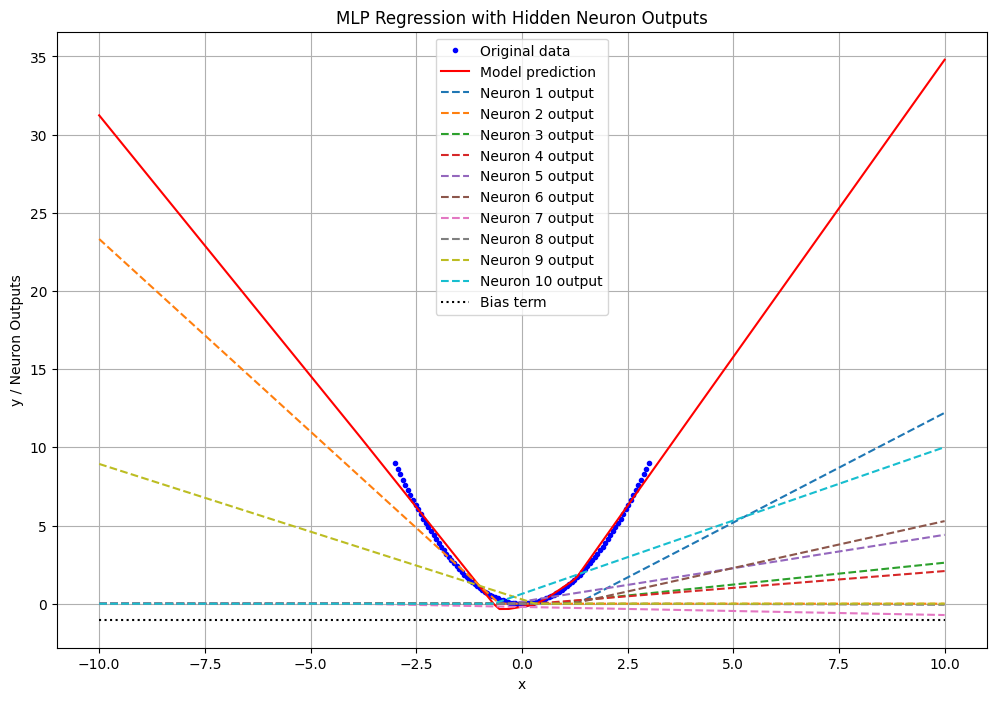

Done


In [3]:

xx, yy = create_dataset(n_samples=1000, range=10)
with torch.no_grad():
    y_pred = model(xx).numpy()
    # get the hidden activations and outputs
    hidden_activations = model.a.numpy()
    hidden_outputs = model.h.numpy()

# get the weights and biases of the output layer:
weights = model.output.weight.data.numpy()
bias = model.output.bias.data.numpy()
    
plt.figure(figsize=(12, 8))
# plot the original data and the model's predictions
plt.plot(x.numpy(), y.numpy(), 'b.', label='Original data')
plt.plot(xx.numpy(), y_pred, 'r-', label='Model prediction')
# show per hidden neuron the hidden outputs:
for i in range(hidden_outputs.shape[1]):
    plt.plot(xx.numpy(), weights[0][i] * hidden_outputs[:, i], '--', label=f'Neuron {i+1} output')
plt.plot(xx.numpy(), bias * np.ones_like(xx.numpy()), 'k:', label='Bias term')
plt.title('MLP Regression with Hidden Neuron Outputs')
plt.xlabel('x')
plt.ylabel('y / Neuron Outputs')
plt.legend()
plt.grid()
plt.show()

print('Done')


4. Changing the activation to Tanh shows why the neural network will "flatten out" its outputs outside of the training domain: The Tanh activation functions get saturated outside of the training domain. 